In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Credit_score.csv')

In [ ]:
display(df.head())

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231


In [ ]:
df.shape

(100000, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
df.drop(['ID'],axis=1,inplace=True)

In [ ]:
# Apply split() to extract the number of years from the 'Credit_History_Age' column
df['Credit_History_Age'] = df['Credit_History_Age'].apply(lambda x: int(x.split()[0]) if pd.notnull(x) else 0)
# Calculate the mode of the 'Type_of_Loan' column
mode_type_of_loan = df['Type_of_Loan'].mode()[0]

# Fill the missing values in the 'Type_of_Loan' column with the mode
df['Type_of_Loan'].fillna(mode_type_of_loan, inplace=True)

In [ ]:
# Convert numerical columns that are currently of type 'object' to numeric, forcing errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

In [ ]:
# Replace negative values in the selected columns with 0
df[['Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment']] = df[['Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment']].applymap(lambda x: 0 if x < 0 else x)

Credit Score based on 3m and 6months for each *customer*

In [ ]:
# Create a mapping of month names to month numbers
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Convert month names to month numbers
df['Month_Number'] = df['Month'].map(month_mapping)

# Define a function to filter and calculate aggregated features
def calculate_aggregated_features(data, start_month, end_month):
    filtered_data = data[
        (data['Month_Number'] >= start_month) &
        (data['Month_Number'] <= end_month)
    ]

    agg_features = filtered_data.groupby('Customer_ID').agg(
        Total_Loan_Amount=('Num_of_Loan', 'sum'),
        Total_Delayed_Payments=('Num_of_Delayed_Payment', 'sum'),
        Total_Outstanding_Debt=('Outstanding_Debt', 'sum'),
        Average_Credit_Utilization=('Credit_Utilization_Ratio', 'mean'),
        Total_EMI=('Total_EMI_per_month', 'sum'),
        Average_Age=('Age', 'mean'),
        Monthly_Inhand_Salary=('Monthly_Inhand_Salary', 'mean')
    ).reset_index()
    return agg_features

# Calculate aggregated features for the last 3 and 6 months
agg_3m = calculate_aggregated_features(df, 1, 3)  # Last 3 months: Feb, Mar, Apr
agg_6m = calculate_aggregated_features(df, 1, 6)  # Last 6 months: Jan, Feb, Mar, Apr

# Hypothetical Credit Score Calculation
def calculate_credit_score(aggregated_df):
    weights = {
        'Total_Loan_Amount': 0.2,
        'Total_Delayed_Payments': -0.2,
        'Total_Outstanding_Debt': -0.2,
        'Average_Credit_Utilization': -0.2,
        'Total_EMI': 0.2,
        'Average_Age': 0.1,
        'Monthly_Inhand_Salary': 0.1
    }

    # Calculate the credit score for each feature based on the defined weights
    for feature, weight in weights.items():
        aggregated_df[f'Credit_Score_{feature}'] = aggregated_df[feature] * weight

    # Sum the individual credit scores to get the total credit score
    aggregated_df['Total_Credit_Score'] = aggregated_df[[f'Credit_Score_{feature}' for feature in weights]].sum(axis=1)

    # Scale the credit score to be between 0 and 1000
    max_score = aggregated_df['Total_Credit_Score'].max()
    min_score = aggregated_df['Total_Credit_Score'].min()
    aggregated_df['Total_Credit_Score'] = ((aggregated_df['Total_Credit_Score'] - min_score) / (max_score - min_score)) * 900

    return aggregated_df

# Calculate credit scores for aggregated data
agg_3m_with_score = calculate_credit_score(agg_3m)
agg_6m_with_score = calculate_credit_score(agg_6m)

# Merge scores into a single DataFrame for final output
final_output = pd.merge(
    agg_3m_with_score[['Customer_ID', 'Total_Credit_Score']],
    agg_6m_with_score[['Customer_ID', 'Total_Credit_Score']],
    on='Customer_ID',
    suffixes=('_3m', '_6m')
)

final_output.columns = ['Customer_ID', 'Credit_Score_Last_3_Months', 'Credit_Score_Last_6_Months']

print("Final Credit Scores for Each Customer_ID:")
print(final_output)


Final Credit Scores for Each Customer_ID:
      Customer_ID  Credit_Score_Last_3_Months  Credit_Score_Last_6_Months
0      CUS_0x1000                   57.104171                   76.873108
1      CUS_0x1009                   71.753194                  106.437240
2      CUS_0x100b                   78.643136                   98.185733
3      CUS_0x1011                   78.276402                  104.642421
4      CUS_0x1013                   75.601330                   96.147523
...           ...                         ...                         ...
12495   CUS_0xff3                   58.301028                   81.166023
12496   CUS_0xff4                   67.641912                   93.708738
12497   CUS_0xff6                   89.841464                  114.828256
12498   CUS_0xffc                   69.226254                   91.068894
12499   CUS_0xffd                   59.682442                   78.991650

[12500 rows x 3 columns]


In [ ]:
def get_next_max_value(series, exclude_value):
    # Get value counts
    counts = series.value_counts()

    # Check if the most frequent value is the excluded one
    if counts.idxmax() == exclude_value:
        # Remove the excluded value from the counts
        counts = counts.drop(exclude_value)

    # Return the most frequent value (or next one if excluded)
    return counts.idxmax()

def get_age(series,value):
    # Get value counts
    counts = series.value_counts()
    if counts.idxmax() < value:
        counts = counts.drop(counts.idxmax())
    return counts.idxmax()

In [ ]:
# Aggregating the DataFrame by Customer_ID
df_agg = df.groupby('Customer_ID').agg({
    'Name': lambda x: x.value_counts().idxmax(),      # Take mode of Name
    'Age': lambda x: get_age(x,1),                          # Take maximum Age
    'SSN': lambda x: x.value_counts().idxmax(),       # Take mode of SSN
    'Occupation': lambda x: get_next_max_value(x, '_______'),  # Take mode of Occupation
    'Annual_Income': lambda x: x.value_counts().idxmax(),  # Take mode of Annual Income
    'Monthly_Inhand_Salary': lambda x: x.value_counts().idxmax(),       # Take mean of Monthly Inhand Salary
    'Num_Bank_Accounts': 'max',            # Take max of Num_Bank_Accounts
    'Num_Credit_Card': 'max',              # Take max of Num_Credit_Card
    'Interest_Rate':lambda x: x.value_counts().idxmax(),               # Mean of Interest Rate
    'Num_of_Loan': 'max',                  # Take max of Num_of_Loan
    'Type_of_Loan':lambda x: x.mode()[0] if not x.mode().empty else np.nan,   # Take mode of Type_of_Loan
    'Delay_from_due_date': 'mean',         # Mean of Delay from due date
    'Num_of_Delayed_Payment': 'mean',      # Mean of Num_of_Delayed_Payment
    'Changed_Credit_Limit': 'max',         # Take max of Changed_Credit_Limit
    'Num_Credit_Inquiries': 'mean',        # Mean of Num_Credit_Inquiries
    'Credit_Mix':lambda x: x.value_counts().idxmax(),     # Take mode of Credit Mix
    'Outstanding_Debt': 'mean',            # Mean of Outstanding Debt
    'Credit_Utilization_Ratio': 'mean',    # Mean of Credit Utilization Ratio
    'Credit_History_Age': 'max',           # Take max of Credit History Age
    'Payment_of_Min_Amount': 'first',      # Take first of Payment_of_Min_Amount
    'Total_EMI_per_month': 'mean',         # Mean of Total EMI per month
    'Amount_invested_monthly': 'mean',     # Mean of Amount invested monthly
    'Payment_Behaviour': lambda x: x.value_counts().idxmax(),  # Take mode of Payment_Behaviour
    'Monthly_Balance': 'mean'              # Mean of Monthly Balance
})


# Resetting the index to get Customer_ID as a column
df_agg.reset_index(inplace=True)

# Show the aggregated DataFrame
df_agg.head()


,Customer_ID,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,CUS_0x1000,Alistair Barrf,17.0,913-74-1218,Lawyer,30625.94,2706.161667,6,5,27,...,10.875,Bad,1562.91,33.477546,10,Yes,42.941090,158.549735,Low_spent_Large_value_payments,335.375341
1,CUS_0x1009,Arunah,26.0,063-67-6938,Mechanic,52312.68,4250.390000,6,5,17,...,3.000,Standard,202.68,29.839984,31,NM,108.366467,146.679378,High_spent_Medium_value_payments,428.743155
2,CUS_0x100b,Shirboni,18.0,238-62-0395,Media_Manager,113781.39,9549.782500,1,4,1,...,285.500,Good,1030.20,34.841449,15,No,0.000000,505.386526,High_spent_Large_value_payments,781.229776
3,CUS_0x1011,Schneyerh,44.0,793-05-8223,Doctor,58918.47,5208.872500,3,3,17,...,251.750,Standard,473.14,27.655897,15,Yes,123.434939,311.060914,Low_spent_Medium_value_payments,332.642837
4,CUS_0x1013,Cameront,44.0,930-49-9615,Mechanic,98620.98,7962.415000,3,3,6,...,3.000,Good,1233.51,31.933940,17,No,6266.765823,355.442408,High_spent_Medium_value_payments,472.781009


In [ ]:
df_agg.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000
mean,33.282000,50505.123449,4199.448777,96.400720,134.307280,14.532080,29.501360,21.081910,30.865967,27.695146,1426.220376,32.285173,18.235920,1403.118217,195.751837,403.120320
std,10.766945,38300.762656,3188.435232,317.256981,336.763023,8.741636,159.361136,14.755035,84.361131,68.832405,1155.169458,2.060556,8.313547,2914.621376,136.847120,175.476887
min,14.000000,7005.930000,303.645417,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.230000,25.476634,0.000000,0.000000,14.528879,92.841401
25%,24.000000,19342.972500,1628.239792,4.000000,4.000000,7.000000,2.000000,9.875000,9.250000,3.000000,566.072500,30.854492,12.000000,41.104466,97.690749,284.546710
50%,33.000000,36999.705000,3095.941666,6.000000,6.000000,13.000000,3.000000,17.875000,14.500000,6.000000,1166.155000,32.241830,18.000000,105.291487,152.081485,338.491580
75%,42.000000,71683.470000,5962.529583,8.000000,9.000000,20.000000,6.000000,28.000000,19.000000,10.250000,1945.962500,33.600168,25.000000,369.930934,257.566585,465.372970
max,56.000000,179987.280000,15204.633330,1798.000000,1499.000000,34.000000,1496.000000,63.250000,1147.333333,602.250000,4998.070000,42.395301,33.000000,29986.742104,1005.847285,1349.264887


In [ ]:
df_agg.isnull().sum()

,0
Customer_ID,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0


In [ ]:
df_agg.columns

Index(['Customer_ID', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [ ]:
df =df_agg.drop_duplicates()

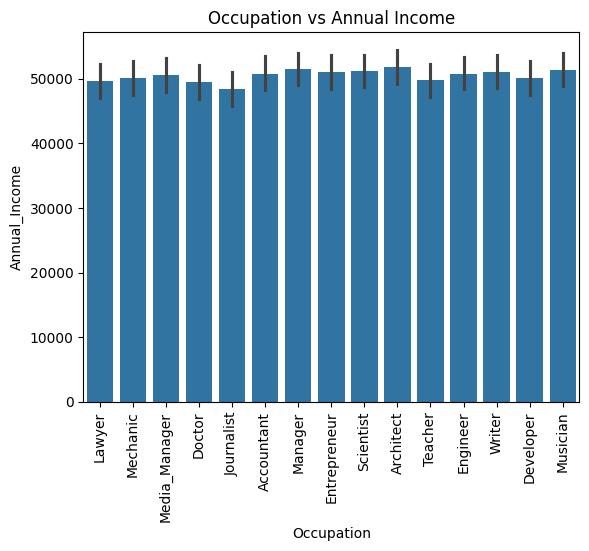

In [ ]:
# 1. Occupation vs Annual Income
sns.barplot(x='Occupation', y='Annual_Income', data=df_agg)
plt.xticks(rotation=90)
plt.title('Occupation vs Annual Income')
plt.show()

Insights :
Seems occupation is not influencing Annual Income

In [ ]:
# Define bins and labels
bins = [-float('inf'), 25, 40, float('inf')]
labels = ['< 25', '25-40', '> 40']

# Create a new column for Age Categories
df_agg['Age_Category'] = pd.cut(df_agg['Age'], bins=bins, labels=labels)

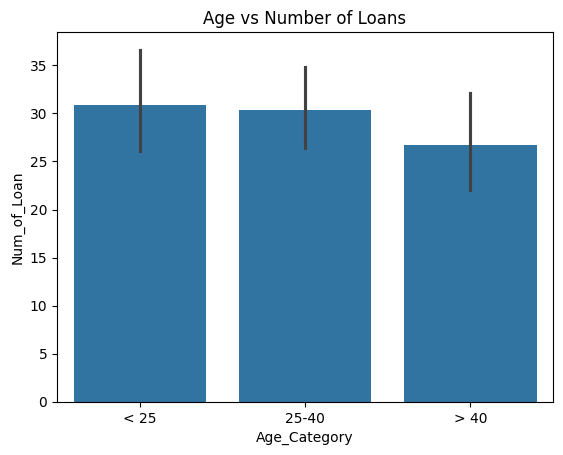

In [ ]:
# 2. Age vs Number of Loans
sns.barplot(x='Age_Category', y='Num_of_Loan', data=df_agg)
plt.title('Age vs Number of Loans')
plt.show()

Insights:


1.   Customers are age <40 are having more number of loans

2.  Age >40 are having less number of loans



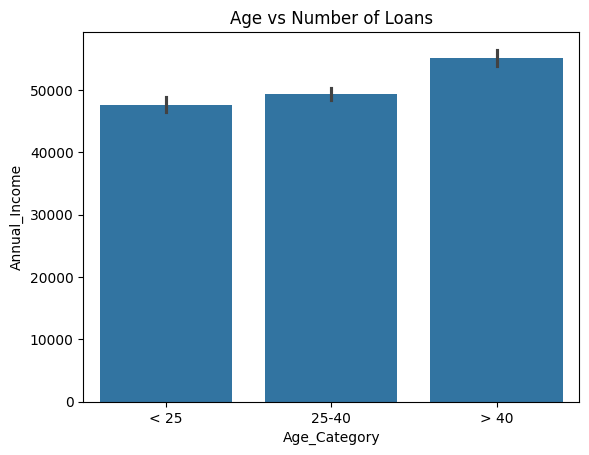

In [ ]:
# 3. Age vs Number of Loans
sns.barplot(x='Age_Category', y='Annual_Income', data=df_agg)
plt.title('Age vs Number of Loans')
plt.show()

Insights:


*   customers age <= 40 their salary is  closer
*   but customers age > 40 having higher salary and less no of loans


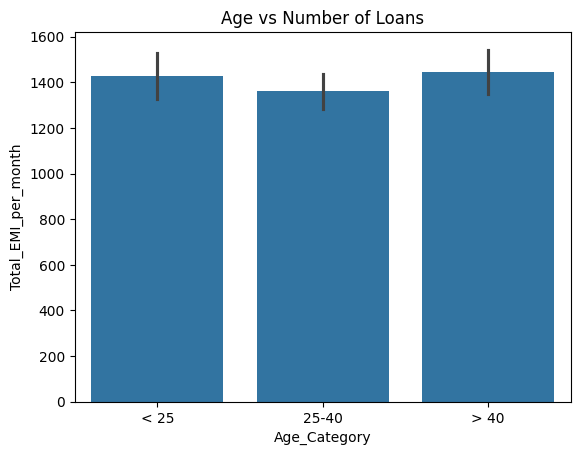

In [ ]:
# 4. Age vs Number of Loans
sns.barplot(x='Age_Category', y='Total_EMI_per_month', data=df_agg)
plt.title('Age vs Number of Loans')
plt.show()

Insights:


*   customers age < 25 and >40 are having similar EMI range
*   But customers with age >40 are having less number of loans and higher salary

Recommendations :


*   Customers with age < 25 having less EMI and less loans we can focus to saction loans
*   customers age > 40 are having less EMI can also focus giving short loan


*   customers < 25 we can offer long term loans







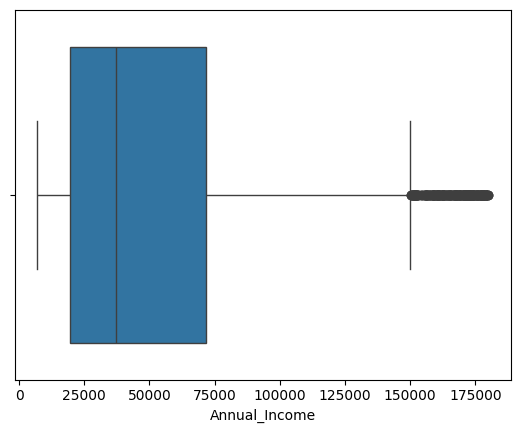

In [ ]:
# Box plot for outlier detection
sns.boxplot(x='Annual_Income', data=df)
plt.show()


In [ ]:
df['Debt_to_Income_Ratio'] = df['Outstanding_Debt'] / df['Annual_Income']


In [ ]:
# Flag for bad payment behavior
df['Bad_Payment_Behaviour'] = df['Payment_Behaviour'].apply(lambda x: 1 if 'Delayed' in x else 0)


In [ ]:
# Create flag if person has more than one type of loan
df['Multiple_Loans'] = df['Type_of_Loan'].apply(lambda x: 1 if len(x.split(',')) > 1 else 0)


In [ ]:
# Normalize the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[['Credit_Utilization_Ratio', 'Num_of_Delayed_Payment', 'Debt_to_Income_Ratio',
    'Credit_History_Age']] = scaler.fit_transform(df[['Credit_Utilization_Ratio',
    'Num_of_Delayed_Payment', 'Debt_to_Income_Ratio', 'Credit_History_Age']])

# Define weights for each factor
df['Credit_Score'] = (0.35 * (1 - df['Num_of_Delayed_Payment']) +
                      0.30 * (1 - df['Credit_Utilization_Ratio']) +
                      0.15 * df['Credit_History_Age'] +
                      0.15 * (1 - df['Debt_to_Income_Ratio']) +
                      0.10 * df['Multiple_Loans']) * 900

# Display the final score
print(df[['Customer_ID', 'Credit_Score']])


      Customer_ID  Credit_Score
0      CUS_0x1000    706.278457
1      CUS_0x1009    802.106509
2      CUS_0x100b    628.100067
3      CUS_0x1011    831.155563
4      CUS_0x1013    771.710367
...           ...           ...
12495   CUS_0xff3    744.558451
12496   CUS_0xff4    760.824332
12497   CUS_0xff6    782.334585
12498   CUS_0xffc    706.955371
12499   CUS_0xffd    769.959474

[12500 rows x 2 columns]


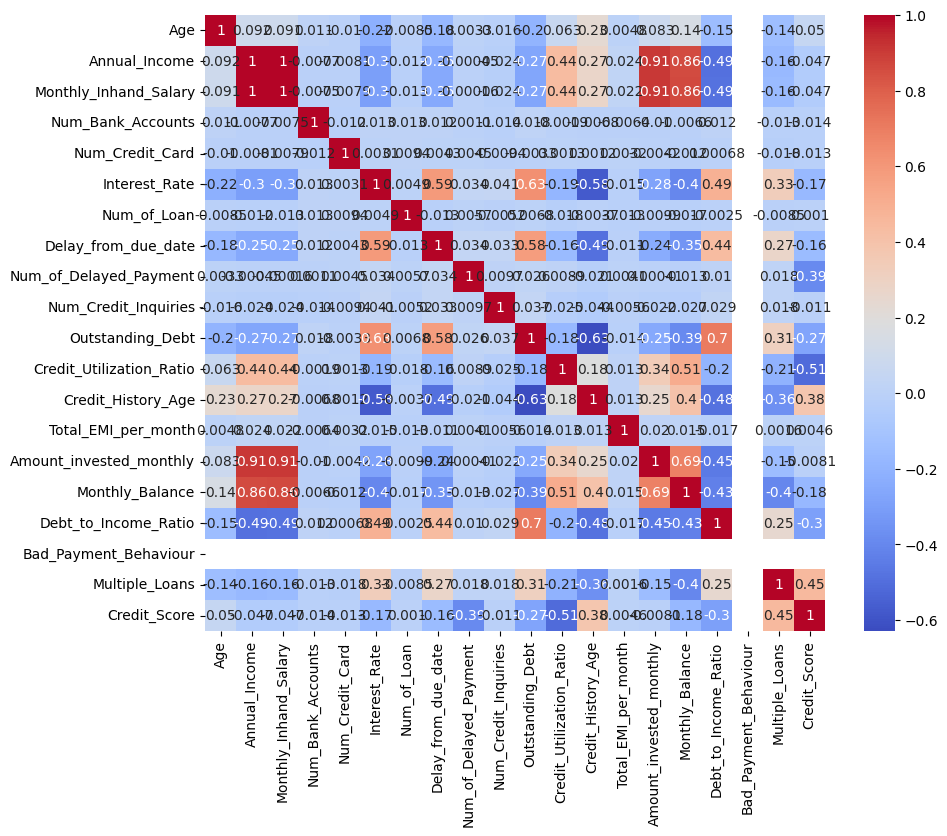

In [ ]:
#5. correlation Heatmap
df_numeric = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()


To calculate a hypothetical credit score, consider these factors (inspired by FICO scoring):

1. Credit Utilization (30%): Use Credit_Utilization_Ratio.
2. Payment History (35%): Use Num_of_Delayed_Payment and Payment_Behaviour.
3. Debt-to-Income Ratio (15%): Use Debt_to_Income_Ratio.
4. Length of Credit History (15%): Use Credit_History_Age_Years.
5. Types of Credit (10%): Use Multiple_Loans and Num_of_Loan.

Insights:


1.  Intrest rates are highly changable based on debt_to_income_ratio,High delay in due,less credit history age
2.   High chances of delay in due if out standing dbt is high
3. Customers with higher credit utilization ratios and more delayed payments generally have lower credit scores.
4. Debt-to-income ratio is a strong indicator of a customer’s ability to manage loans.
5. Longer credit histories tend to be associated with more stable payment behavior.

Recommendations:

1. Reduce High Debt-to-Income Ratios:
    Focus on customers with high outstanding debts compared to their income, as they are at a higher risk of default.
2. Monitor Payment Behavior:
    Customers with multiple delayed payments should be monitored more closely, and automatic payment reminders can be used to reduce delinquencies.
3. Focus on Credit Utilization:
    Customers with high credit utilization ratios could be advised to lower their usage to improve their credit scores.
4. Credit History Length:
    Customers with shorter credit histories might need more assistance or guidance in managing their finances.
